In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadData():
    x = np.load("data/ex7_X.npy")
    return x

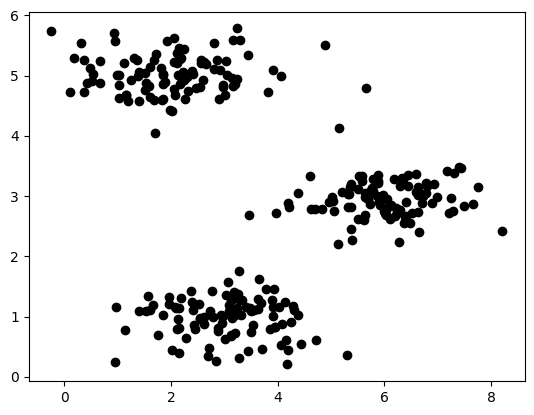

In [3]:
x = loadData()

plt.scatter(x[:, 0], x[:, 1], c = "black")
plt.show()

In [4]:
def findCluster(x, centroids):
    disMatrix = (x[:, np.newaxis, :] - centroids) ** 2
    disMatrix = np.sum(disMatrix, axis = -1)
    cluster = np.argmin(disMatrix, axis = -1)
    return cluster

def computeCentroids(x, cluster, k):
    centroids = np.zeros((k, 2))
    for c in range(k):
        centroids[c] = np.mean(x[cluster == c], axis = 0)
    return centroids

def kmean(x, k, maxIter):
    centroids = np.random.choice(np.arange(len(x)), k, replace = False)
    centroids = x[centroids]

    centroidsHistory = []
    centroidsHistory.append(centroids)
    
    for i in range(maxIter):
        cluster = findCluster(x, centroids)
        centroids = computeCentroids(x, cluster, k)
        centroidsHistory.append(centroids)
    
    return cluster, centroidsHistory

In [5]:
k = 3
cluster, centroidsHistory = kmean(x, k, 10)

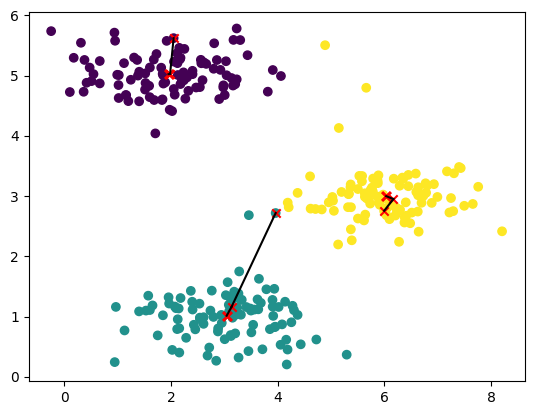

In [6]:
plt.scatter(x[:, 0], x[:, 1], c = cluster)

for j in range(k):
    plt.scatter(centroidsHistory[0][j, 0], centroidsHistory[0][j, 1], c = 'red', marker = 'x')

for i in range(len(centroidsHistory) - 1):
    prev = centroidsHistory[i]
    curr = centroidsHistory[i + 1]
    for j in range(k):
        plt.plot([prev[j, 0], curr[j, 0]], [prev[j, 1], curr[j, 1]], '-k')
        plt.scatter(curr[j, 0], curr[j, 1], c = 'red', marker = 'x')
plt.show()